In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

**<span style="font-size: 100%;"> Q2) Binomial R.V.</span>**

In [2]:
def binomial_cdf_inv(n, p, size):
    q = 1 - p
    s = np.zeros(size)
    for i in range(size):
        u = np.random.uniform(0, 1)
        j = 0
        F = (1 - q**n) / (1 - q)
        while u > F:
            j += 1
            F += (p**j * q**(n-j) * (n-j+1)) / (j * (1-q))
        s[i] = j
    return s

In [3]:
def binomial_bernoulli_var(n, p, size):
    s = np.zeros(size)
    for i in range(size):
        s[i] = np.sum(np.random.binomial(1, p, n))
    return s

In [4]:
def binomial_geo_strings(n, p, size):
    s = np.zeros(size)
    for i in range(size):
        u = np.random.uniform(0, 1, n)
        x = np.zeros(n)
        x[u <= p] = 1
        s[i] = np.sum(x)
    return s

In [5]:
n_values = [10, 50, 100, 500]
p_values = [0.1, 0.5, 0.9]
sizes = [100000]

In [6]:
counter = 1
for n in n_values:
    for p in p_values:
        for size in sizes:
            print("Round " +str(counter)+ ": ")
            start_time = time.time()
            binomial_cdf_inv(n, p, size)
            end_time = time.time()
            print(f"CDF inversion method for n={n}, p={p}: {end_time - start_time:.6f} seconds")
            
            start_time = time.time()
            binomial_bernoulli_var(n, p, size)
            end_time = time.time()
            print(f"Bernoulli sequence method for n={n}, p={p}: {end_time - start_time:.6f} seconds")
            
            start_time = time.time()
            binomial_geo_strings(n, p, size)
            end_time = time.time()
            print(f"Geometric string method for n={n}, p={p}: {end_time - start_time:.6f} seconds")
            print()
            counter = counter + 1

Round 1: 
CDF inversion method for n=10, p=0.1: 0.438327 seconds
Bernoulli sequence method for n=10, p=0.1: 0.801564 seconds
Geometric string method for n=10, p=0.1: 1.222444 seconds

Round 2: 
CDF inversion method for n=10, p=0.5: 0.389583 seconds
Bernoulli sequence method for n=10, p=0.5: 0.821778 seconds
Geometric string method for n=10, p=0.5: 1.403261 seconds

Round 3: 
CDF inversion method for n=10, p=0.9: 0.378945 seconds
Bernoulli sequence method for n=10, p=0.9: 0.823935 seconds
Geometric string method for n=10, p=0.9: 1.121818 seconds

Round 4: 
CDF inversion method for n=50, p=0.1: 0.260669 seconds
Bernoulli sequence method for n=50, p=0.1: 0.570580 seconds
Geometric string method for n=50, p=0.1: 1.011271 seconds

Round 5: 
CDF inversion method for n=50, p=0.5: 0.270382 seconds
Bernoulli sequence method for n=50, p=0.5: 0.729853 seconds
Geometric string method for n=50, p=0.5: 1.169611 seconds

Round 6: 
CDF inversion method for n=50, p=0.9: 0.311977 seconds
Bernoulli seque

**<span style="font-size: 100%;"> Q3) Poisson R.V.</span>**

In [7]:
def poisson_cdf_inversion(l):
    L = np.exp(-l)
    k = 0
    p = 1
    while True:
        k += 1
        u = np.random.uniform(0, 1)
        p *= u
        if p < L:
            return k - 1

In [8]:
def poisson_exponential(l):
    x = 0
    s = 0
    while s < l:
        u = np.random.uniform(0, 1)
        s -= np.log(u)
        if s < l:
            x += 1
    return x

In [9]:
def poisson_uniform(l):
    x = 0
    p = np.exp(-l)
    while True:
        u = np.random.uniform(0, 1)
        p *= u
        if p >= 1:
            x += 1
            p /= 1
        else:
            return x

In [10]:
lambdas = [1, 5, 10, 20, 30]
n = 100000

for l in lambdas:
    print("Lambda: " + str(l))
    start_time = time.time()
    samples = [poisson_cdf_inversion(l) for i in range(n)]
    end_time = time.time()
    print(f"CDF inversion: time = {end_time - start_time:.4f} seconds")

    start_time = time.time()
    samples = [poisson_exponential(l) for i in range(n)]
    end_time = time.time()
    print(f"Exponential sum: time = {end_time - start_time:.4f} seconds")

    start_time = time.time()
    samples = [poisson_uniform(l) for i in range(n)]
    end_time = time.time()
    print(f"Uniform product: time = {end_time - start_time:.4f} seconds")
    print()

Lambda: 1
CDF inversion: time = 1.8820 seconds
Exponential sum: time = 1.9504 seconds
Uniform product: time = 1.2154 seconds

Lambda: 5
CDF inversion: time = 5.1756 seconds
Exponential sum: time = 2.8770 seconds
Uniform product: time = 0.6210 seconds

Lambda: 10
CDF inversion: time = 3.6903 seconds
Exponential sum: time = 4.7990 seconds
Uniform product: time = 0.5352 seconds

Lambda: 20
CDF inversion: time = 7.5085 seconds
Exponential sum: time = 8.4975 seconds
Uniform product: time = 0.4863 seconds

Lambda: 30
CDF inversion: time = 8.8660 seconds
Exponential sum: time = 19.3176 seconds
Uniform product: time = 0.5001 seconds



**<span style="font-size: 100%;"> Q5) LCG with a = 65539, m = 2^31</span>**

In [11]:
def lcg(a, m, seed):
    while True:
        seed = (a * seed) % m
        yield seed / m

In [12]:
a = 65539
m = 2**31
seed = 12345
n = 100

In [13]:
lcg = lcg(a, m, seed)
u = [next(lcg) for _ in range(n)]

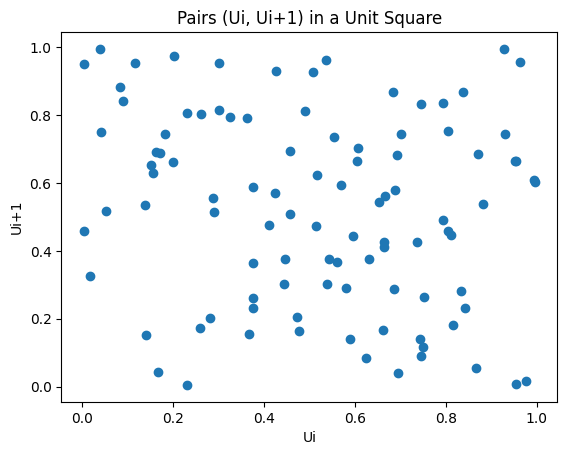

In [14]:
fig, ax = plt.subplots()
ax.scatter(u[:-1], u[1:])
ax.set_xlabel('Ui')
ax.set_ylabel('Ui+1')
ax.set_title('Pairs (Ui, Ui+1) in a Unit Square')
plt.show()

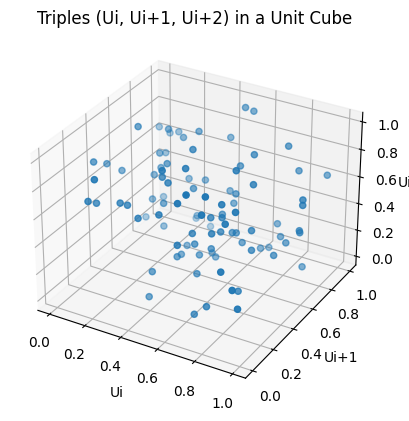

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(u[:-2], u[1:-1], u[2:])
ax.set_xlabel('Ui')
ax.set_ylabel('Ui+1')
ax.set_zlabel('Ui+2')
ax.set_title('Triples (Ui, Ui+1, Ui+2) in a Unit Cube')
plt.show()